In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('ts.csv')
df

,date,value
0,2025-01-01,47.633469
1,2025-01-02,50.494991
2,2025-01-03,48.689381
3,2025-01-04,47.170650
4,2025-01-05,48.216703
...,...,...
360,2025-12-27,521.544756
361,2025-12-28,520.308253
362,2025-12-29,524.720381
363,2025-12-30,528.956471


In [3]:
df.isna().sum()

,0
date,0
value,3


In [4]:
df_new = df.copy()
df_new['ffill'] = df_new['value'].ffill()

In [5]:
df_new.isna().sum()

,0
date,0
value,3
ffill,0


In [6]:
df_new['bfill'] = df_new['value'].bfill()
df_new['nearest'] = df_new['value'].interpolate(method='nearest')
df_new['poly'] = df_new['value'].interpolate(method='polynomial', order=3)

In [7]:
# Создаём таблицу сравнения
comparison = pd.DataFrame({
    'Исходное': df['value'],
    'Метод ffill': df_new['ffill'],
    'Метод bfill': df_new['bfill'],
    'Метод nearest': df_new['nearest'],
    'Метод poly': df_new['poly'],
    'Было пропуском': df['value'].isna()
})

# Фильтруем только строки, где были пропуски
only_missing = comparison[comparison['Было пропуском']]
print("Сравнение: что было и что стало:")
print(only_missing)
#print(comparison)

Сравнение: что было и что стало:
     Исходное  Метод ffill  Метод bfill  Метод nearest  Метод poly  \
15        NaN    42.897429    43.184713      42.897429   41.730936   
33        NaN    38.889053    38.141290      38.889053   38.227649   
193       NaN   140.627064   139.791708     140.627064  140.997269   

     Было пропуском  
15             True  
33             True  
193            True  


In [8]:
# Декомпозиция временного ряда
result = seasonal_decompose(
    df_new['ffill'],
    model='additive',     # модель: 'additive'
    period=12,           # период сезонности (12 месяцев)
    extrapolate_trend='freq'  # экстраполяция тренда
)

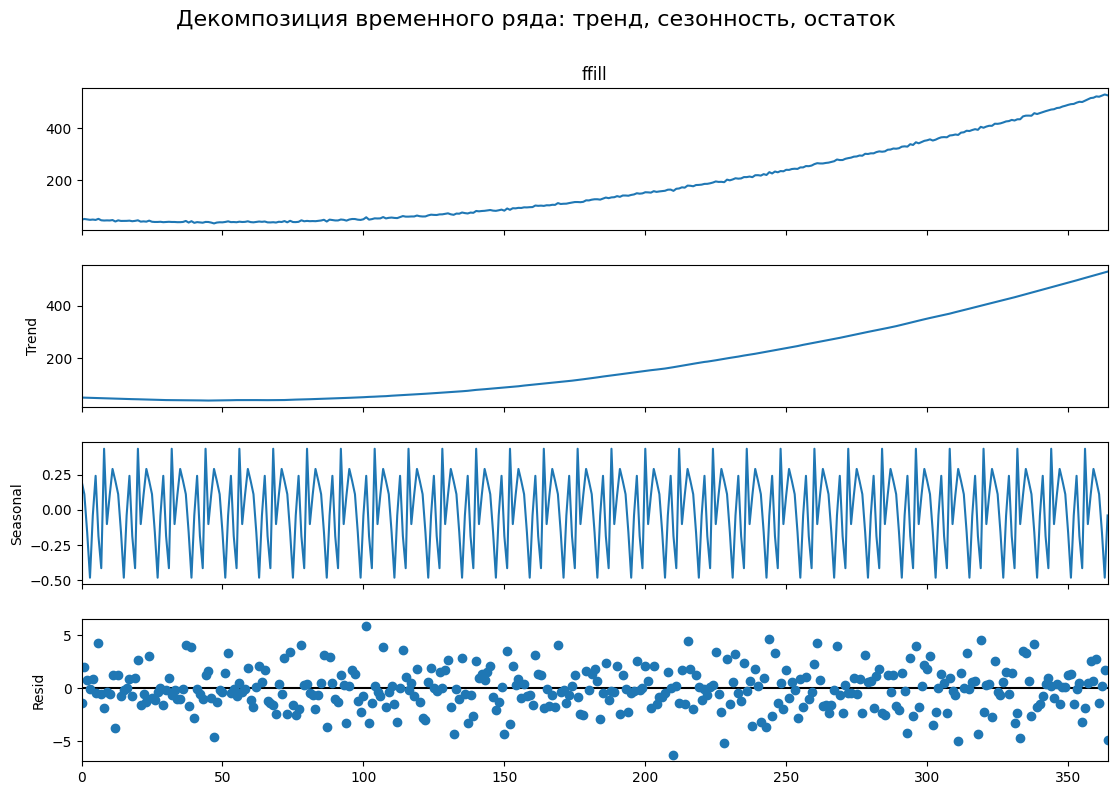

In [9]:
fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Декомпозиция временного ряда: тренд, сезонность, остаток', fontsize=16, y=1.02)
plt.show()

## AIRPLANE

In [10]:
df = pd.read_csv('airline_passengers.csv')
df

,Month,Passengers
0,1/1/1949,112
1,1/2/1949,118
2,1/3/1949,132
3,1/4/1949,129
4,1/5/1949,121
...,...,...
139,1/8/1960,606
140,1/9/1960,508
141,1/10/1960,461
142,1/11/1960,390


In [11]:
# Декомпозиция временного ряда
result = seasonal_decompose(
    df['Passengers'],
    model='additive',     # модель: 'additive'
    period=64,           # период сезонности (12 месяцев)
    extrapolate_trend='freq'  # экстраполяция тренда
)

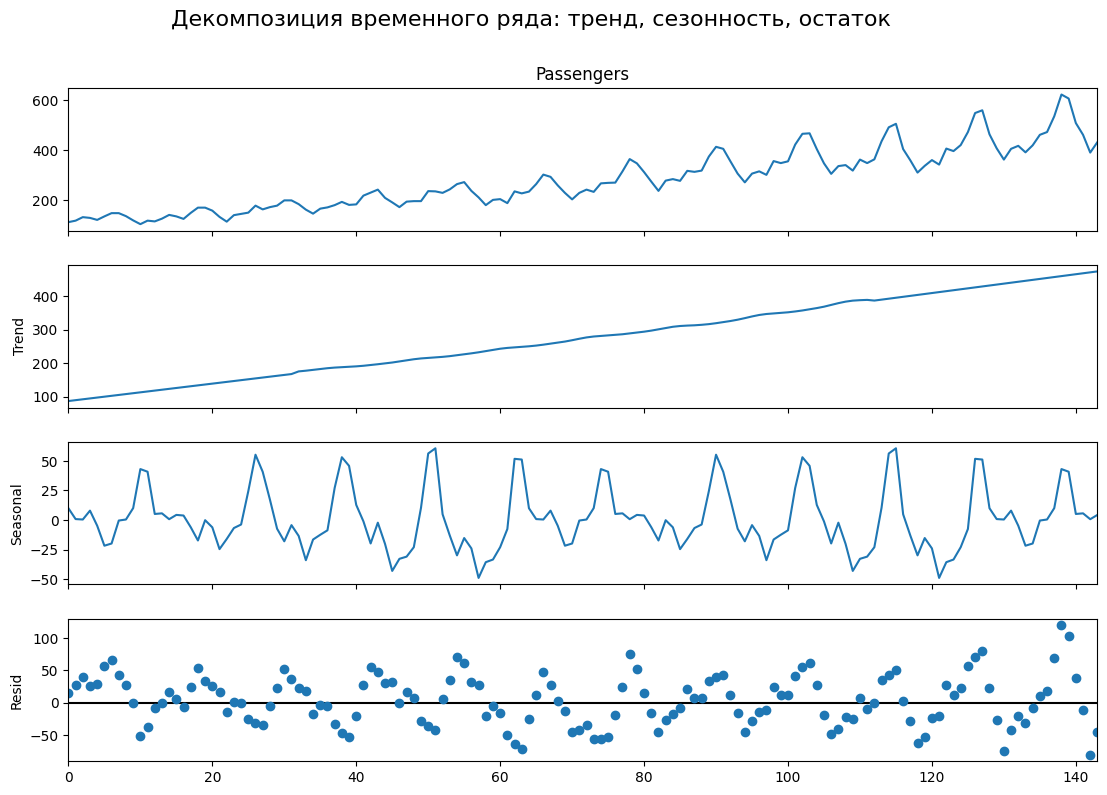

In [12]:
fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Декомпозиция временного ряда: тренд, сезонность, остаток', fontsize=16, y=1.02)
plt.show()

## Пропуски с Временныемы рядами

In [13]:
df = pd.read_csv('tsshift.csv')
df

,date,value
0,2020-01-01,11.282501
1,2020-01-02,11.205090
2,2020-01-03,9.654806
3,2020-01-04,8.488254
4,2020-01-05,10.659761
...,...,...
1820,2024-12-25,32.085267
1821,2024-12-26,27.381547
1822,2024-12-27,30.835004
1823,2024-12-28,29.988088


In [14]:
df.isna().sum()

,0
date,0
value,17


In [15]:
df_new = df.copy()
df_new['ffill'] = df_new['value'].ffill()

In [16]:
df_new.isna().sum()

,0
date,0
value,17
ffill,0


In [17]:
df_new['bfill'] = df_new['value'].bfill()
df_new['nearest'] = df_new['value'].interpolate(method='nearest')
df_new['poly'] = df_new['value'].interpolate(method='polynomial', order=3)

In [18]:
# Создаём таблицу сравнения
comparison = pd.DataFrame({
    'Исходное': df['value'],
    'Метод ffill': df_new['ffill'],
    'Метод bfill': df_new['bfill'],
    'Метод nearest': df_new['nearest'],
    'Метод poly': df_new['poly'],
    'Было пропуском': df['value'].isna()
})

# Фильтруем только строки, где были пропуски
only_missing = comparison[comparison['Было пропуском']]
print("Сравнение: что было и что стало:")
print(only_missing)
#print(comparison)

Сравнение: что было и что стало:
      Исходное  Метод ffill  Метод bfill  Метод nearest  Метод poly  \
8          NaN     8.242686     9.132137       8.242686    8.368057   
9          NaN     8.242686     9.132137       9.132137    8.821008   
30         NaN     9.564531    10.908457       9.564531    9.654325   
123        NaN    -5.345325    -8.103578      -5.345325   -7.471837   
124        NaN    -5.345325    -8.103578      -8.103578   -8.445283   
383        NaN    15.702651    14.205425      15.702651   13.489295   
384        NaN    15.702651    14.205425      15.702651   12.845387   
385        NaN    15.702651    14.205425      14.205425   13.158436   
386        NaN    15.702651    14.205425      14.205425   13.815946   
433        NaN     9.381571     9.989232       9.381571    8.028297   
491        NaN     1.238414    -1.667014       1.238414   -0.344678   
945        NaN     2.301629     2.279820       2.301629    3.179742   
954        NaN     2.270688     0.292072    

In [19]:
df_new

,date,value,ffill,bfill,nearest,poly
0,2020-01-01,11.282501,11.282501,11.282501,11.282501,11.282501
1,2020-01-02,11.205090,11.205090,11.205090,11.205090,11.205090
2,2020-01-03,9.654806,9.654806,9.654806,9.654806,9.654806
3,2020-01-04,8.488254,8.488254,8.488254,8.488254,8.488254
4,2020-01-05,10.659761,10.659761,10.659761,10.659761,10.659761
...,...,...,...,...,...,...
1820,2024-12-25,32.085267,32.085267,32.085267,32.085267,32.085267
1821,2024-12-26,27.381547,27.381547,27.381547,27.381547,27.381547
1822,2024-12-27,30.835004,30.835004,30.835004,30.835004,30.835004
1823,2024-12-28,29.988088,29.988088,29.988088,29.988088,29.988088


In [20]:
# Декомпозиция временного ряда
result = seasonal_decompose(
    df_new['ffill'],
    model='additive',     # модель: 'additive'
    period=12,           # период сезонности (12 месяцев)
    extrapolate_trend='freq'  # экстраполяция тренда
)

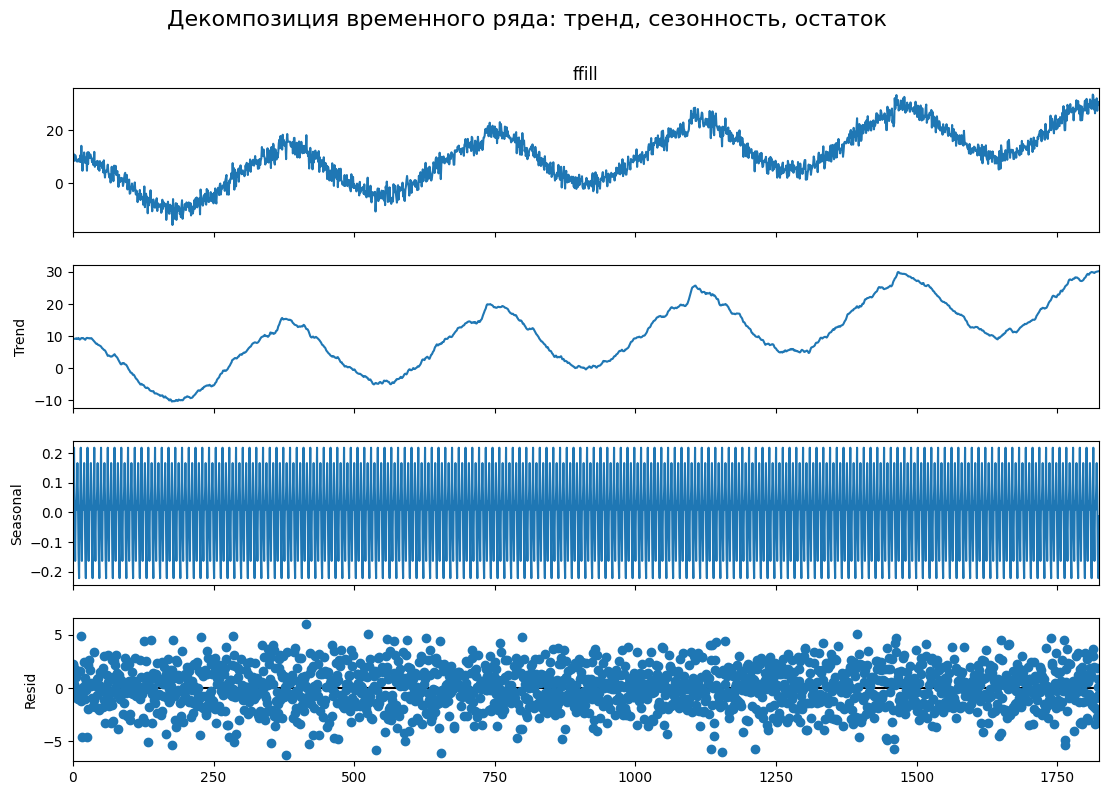

In [21]:
fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Декомпозиция временного ряда: тренд, сезонность, остаток', fontsize=16, y=1.02)
plt.show()

In [22]:
df_new

,date,value,ffill,bfill,nearest,poly
0,2020-01-01,11.282501,11.282501,11.282501,11.282501,11.282501
1,2020-01-02,11.205090,11.205090,11.205090,11.205090,11.205090
2,2020-01-03,9.654806,9.654806,9.654806,9.654806,9.654806
3,2020-01-04,8.488254,8.488254,8.488254,8.488254,8.488254
4,2020-01-05,10.659761,10.659761,10.659761,10.659761,10.659761
...,...,...,...,...,...,...
1820,2024-12-25,32.085267,32.085267,32.085267,32.085267,32.085267
1821,2024-12-26,27.381547,27.381547,27.381547,27.381547,27.381547
1822,2024-12-27,30.835004,30.835004,30.835004,30.835004,30.835004
1823,2024-12-28,29.988088,29.988088,29.988088,29.988088,29.988088


In [23]:
df_new["date"] = pd.to_datetime(df_new["date"], format="%Y-%m-%d")
df_new["monthofyear"] = df_new["date"].dt.month
df_new["dayofyear"] = df_new["date"].dt.dayofyear
df_new["year"] = df_new["date"].dt.year
# df_new["date_float"] = df_new["date"].astype("float64")
df_new

,date,value,ffill,bfill,nearest,poly,monthofyear,dayofyear,year
0,2020-01-01,11.282501,11.282501,11.282501,11.282501,11.282501,1,1,2020
1,2020-01-02,11.205090,11.205090,11.205090,11.205090,11.205090,1,2,2020
2,2020-01-03,9.654806,9.654806,9.654806,9.654806,9.654806,1,3,2020
3,2020-01-04,8.488254,8.488254,8.488254,8.488254,8.488254,1,4,2020
4,2020-01-05,10.659761,10.659761,10.659761,10.659761,10.659761,1,5,2020
...,...,...,...,...,...,...,...,...,...
1820,2024-12-25,32.085267,32.085267,32.085267,32.085267,32.085267,12,360,2024
1821,2024-12-26,27.381547,27.381547,27.381547,27.381547,27.381547,12,361,2024
1822,2024-12-27,30.835004,30.835004,30.835004,30.835004,30.835004,12,362,2024
1823,2024-12-28,29.988088,29.988088,29.988088,29.988088,29.988088,12,363,2024


In [24]:
df_new["cos_monthofyear"] = np.cos(2 * np.pi * (df_new["monthofyear"] - 1) / 12)
df_new["sin_monthofyear"] = np.sin(2 * np.pi * (df_new["monthofyear"] - 1) / 12)

df_new["cos_dayofyear"] = np.cos(2 * np.pi * (df_new["dayofyear"] - 1) / 366)
df_new["sin_dayofyear"] = np.sin(2 * np.pi * (df_new["dayofyear"] - 1) / 366)

In [25]:
df_new

,date,value,ffill,bfill,nearest,poly,monthofyear,dayofyear,year,cos_monthofyear,sin_monthofyear,cos_dayofyear,sin_dayofyear
0,2020-01-01,11.282501,11.282501,11.282501,11.282501,11.282501,1,1,2020,1.000000,0.0,1.000000,0.000000
1,2020-01-02,11.205090,11.205090,11.205090,11.205090,11.205090,1,2,2020,1.000000,0.0,0.999853,0.017166
2,2020-01-03,9.654806,9.654806,9.654806,9.654806,9.654806,1,3,2020,1.000000,0.0,0.999411,0.034328
3,2020-01-04,8.488254,8.488254,8.488254,8.488254,8.488254,1,4,2020,1.000000,0.0,0.998674,0.051479
4,2020-01-05,10.659761,10.659761,10.659761,10.659761,10.659761,1,5,2020,1.000000,0.0,0.997643,0.068615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2024-12-25,32.085267,32.085267,32.085267,32.085267,32.085267,12,360,2024,0.866025,-0.5,0.992788,-0.119881
1821,2024-12-26,27.381547,27.381547,27.381547,27.381547,27.381547,12,361,2024,0.866025,-0.5,0.994700,-0.102821
1822,2024-12-27,30.835004,30.835004,30.835004,30.835004,30.835004,12,362,2024,0.866025,-0.5,0.996318,-0.085731
1823,2024-12-28,29.988088,29.988088,29.988088,29.988088,29.988088,12,363,2024,0.866025,-0.5,0.997643,-0.068615


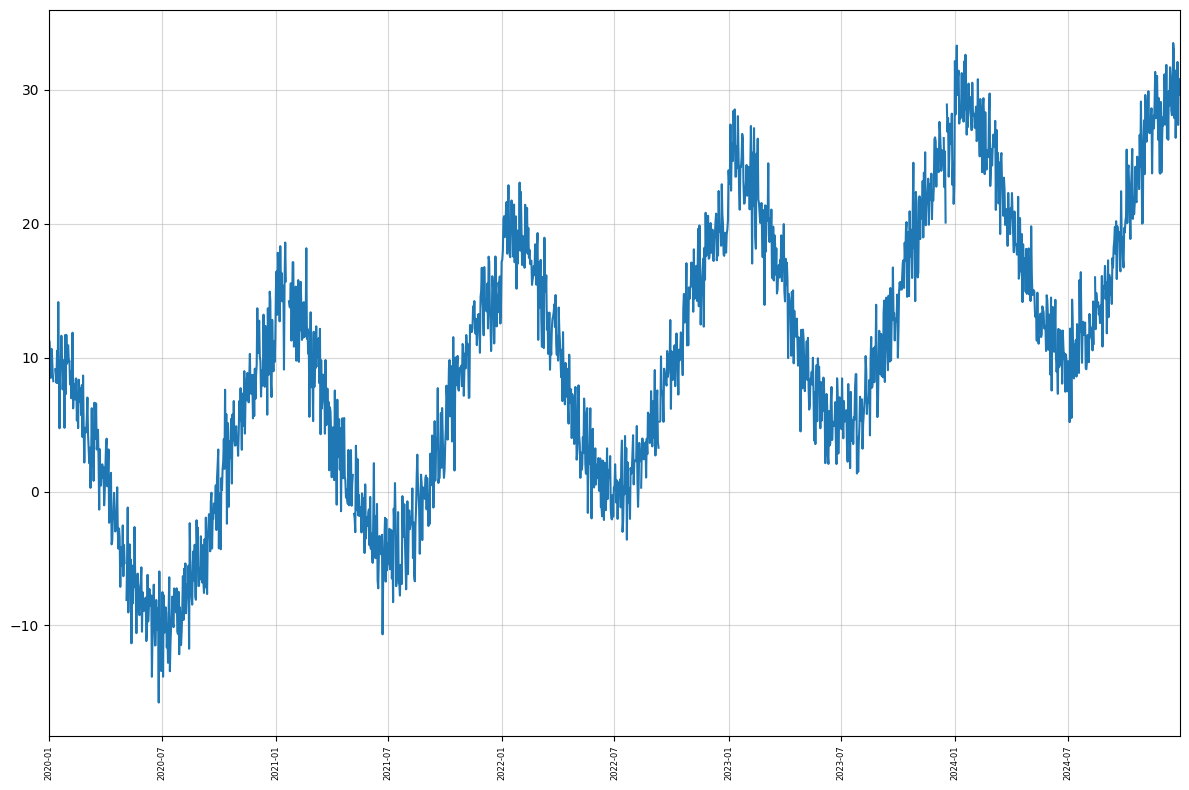

In [26]:
plt.figure(figsize=(12, 8))

plt.plot(df_new["date"], df_new["value"])
# plt.plot(x["Month"], x["Passengers"], label="Train data")
# plt.plot(y["Month"], y["Passengers"], label="Test data")

# plt.xlabel("Date")
# plt.ylabel("Passengers")

plt.xticks(rotation=90, fontsize=6)

# plt.legend()
plt.grid(alpha=.5)

plt.margins(x=0)

plt.tight_layout()
plt.show()

In [27]:
LinearRegression_model = LinearRegression().fit(
	df_new[["cos_dayofyear", "year"]],
	df_new["ffill"]
)

y_pred_train = LinearRegression_model.predict(df_new[["cos_dayofyear", "year"]])
# y_pred_test = LinearRegression_model.predict(x_test)

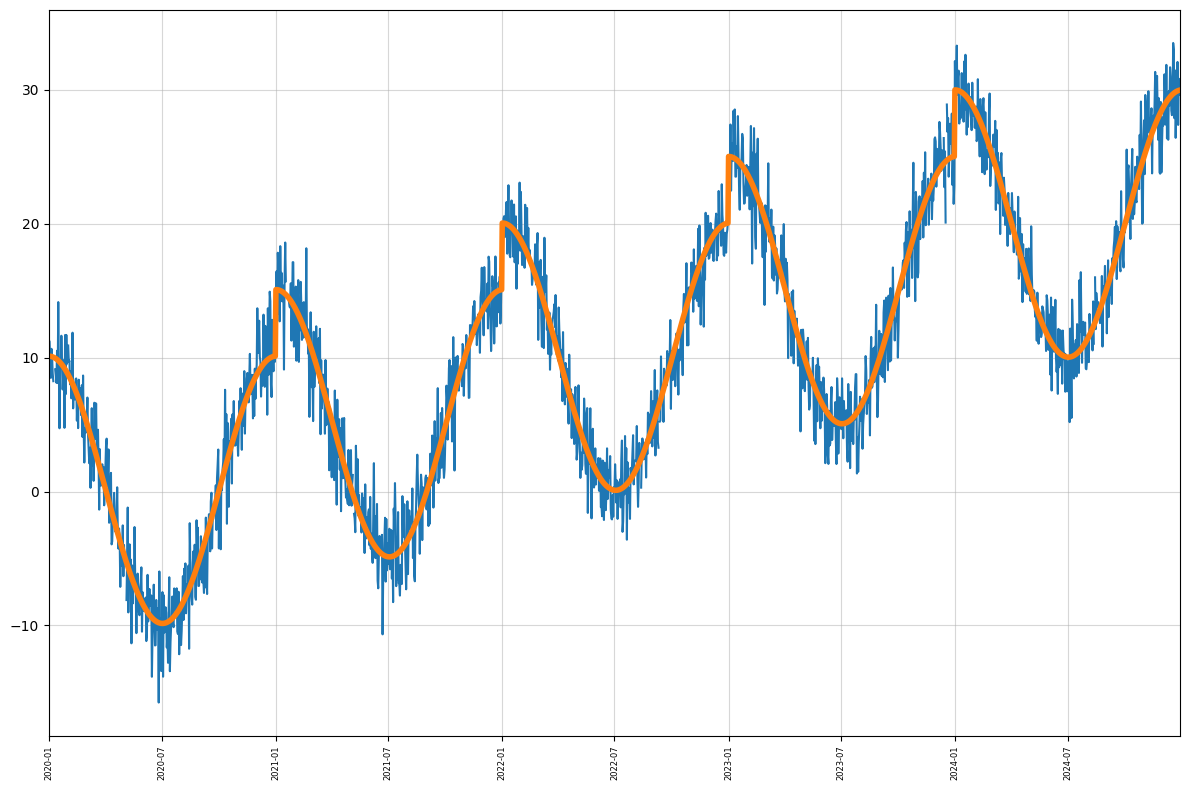

In [28]:
plt.figure(figsize=(12, 8))

plt.plot(df_new["date"], df_new["value"])
plt.plot(df_new["date"], y_pred_train, lw=4)
# plt.plot(x["Month"], x["Passengers"], label="Train data")
# plt.plot(y["Month"], y["Passengers"], label="Test data")

# plt.xlabel("Date")
# plt.ylabel("Passengers")

plt.xticks(rotation=90, fontsize=6)

# plt.legend()
plt.grid(alpha=.5)

plt.margins(x=0)

plt.tight_layout()
plt.show()

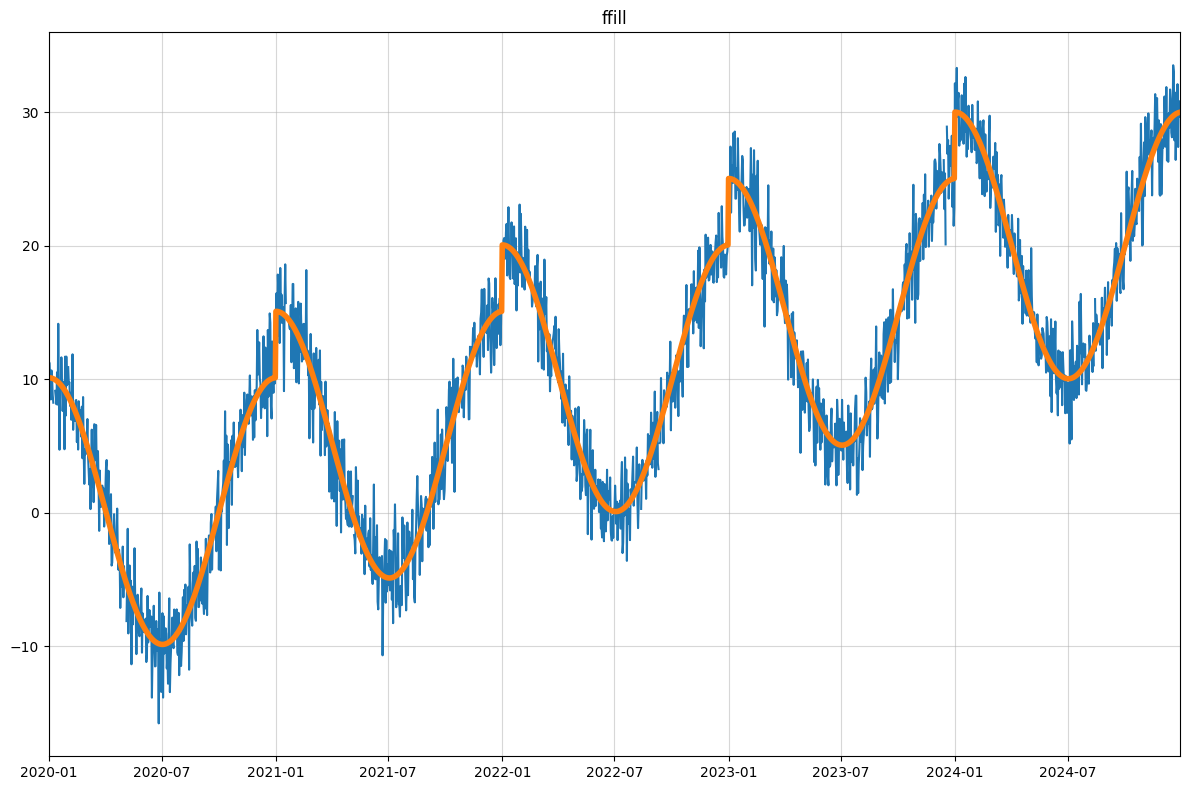

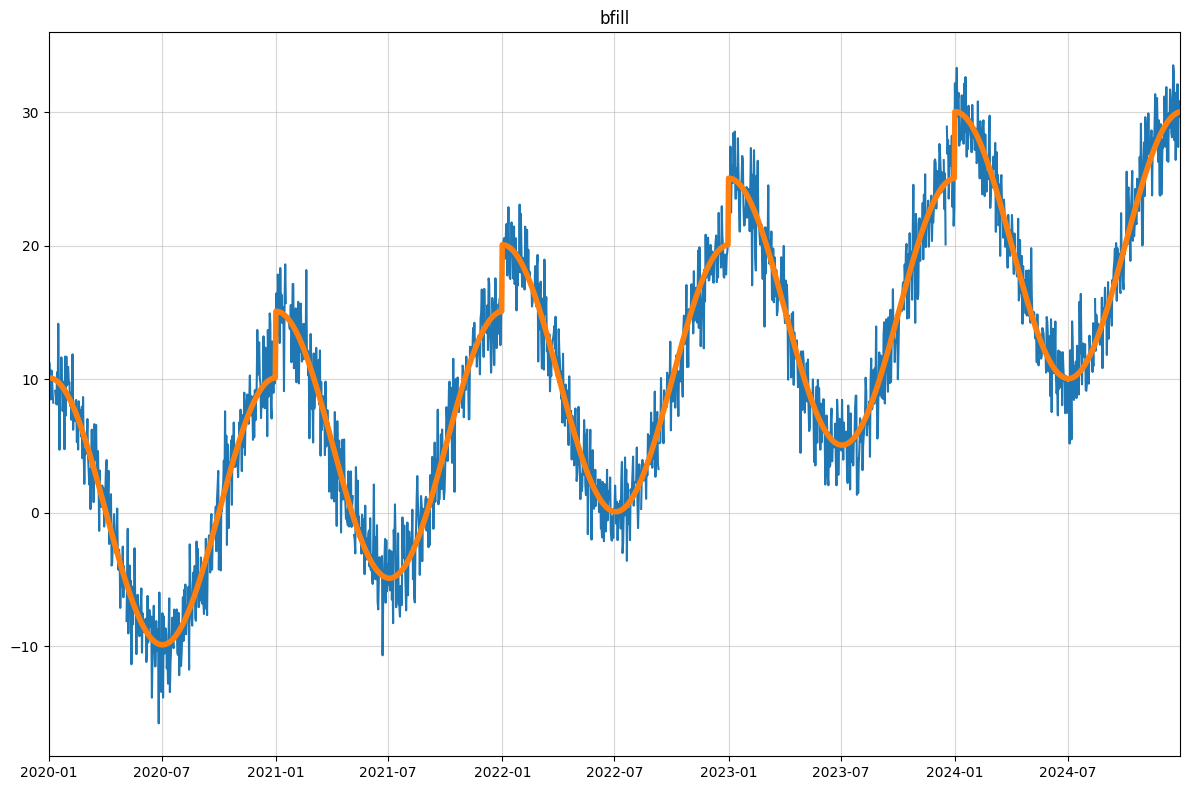

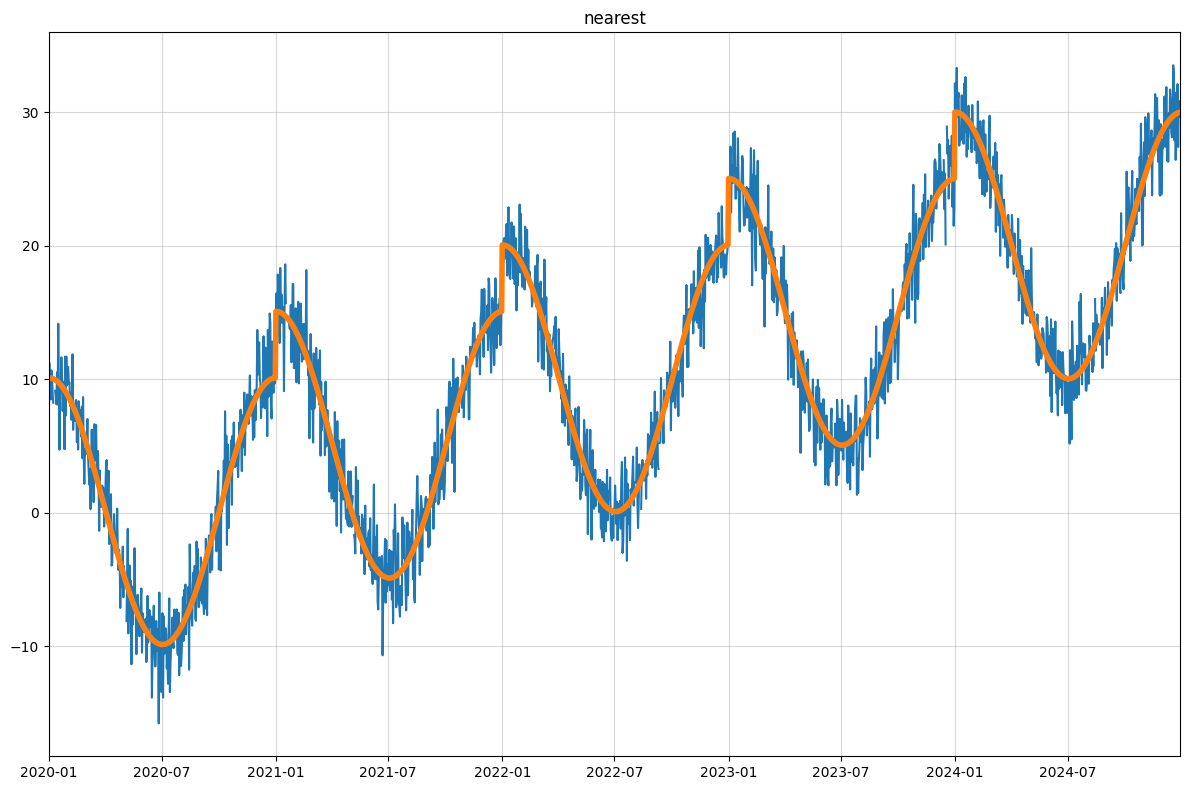

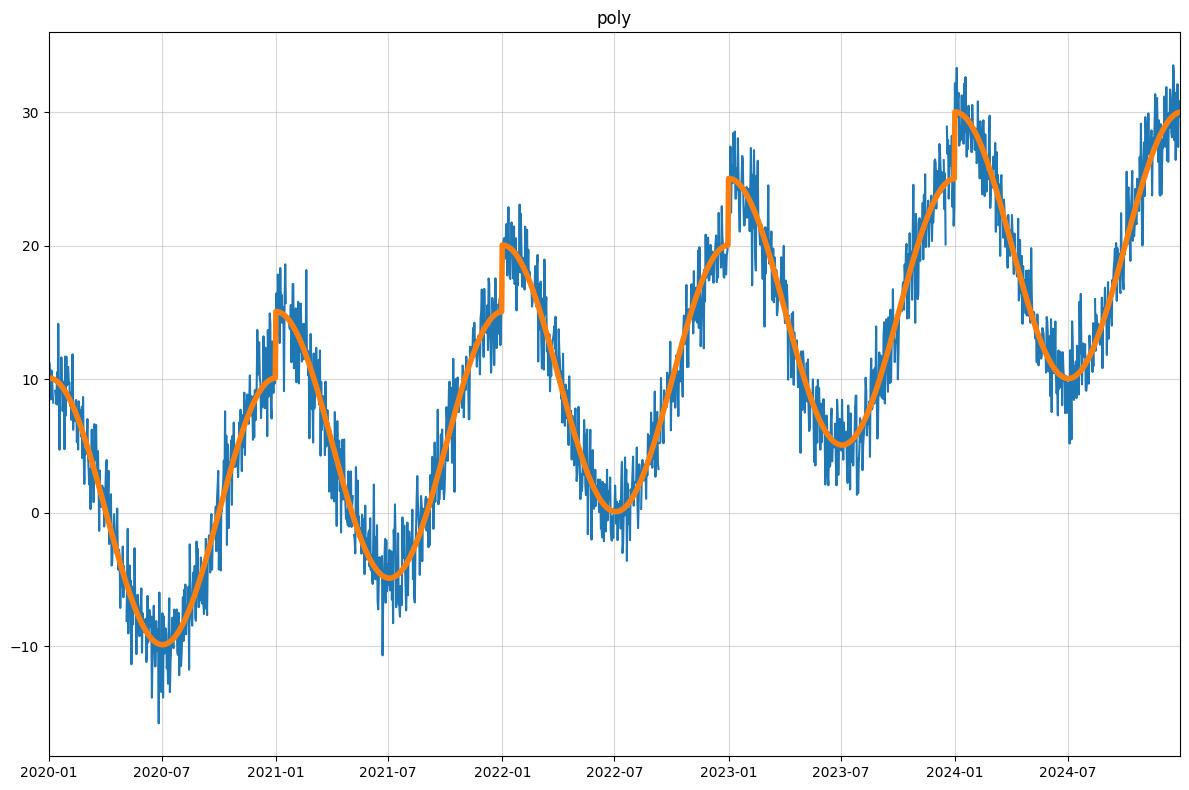

In [29]:
for method in ["ffill", "bfill", "nearest", "poly"]:
    LinearRegression_model = LinearRegression().fit(
	    df_new[["cos_dayofyear", "year"]],
	    df_new[method]
    )

    y_pred_train = LinearRegression_model.predict(df_new[["cos_dayofyear", "year"]])

    plt.figure(figsize=(12, 8))

    plt.plot(df_new["date"], df_new["value"])
    plt.plot(df_new["date"], y_pred_train, lw=4)

    plt.title(method)

    plt.grid(alpha=.5)

    plt.margins(x=0)

    plt.tight_layout()
    plt.show()

In [30]:
x, y = df_new[df_new["year"] <= 2023], df_new[df_new["year"] > 2023]

In [31]:
x_train, y_train = x[["cos_dayofyear", "year"]], x["ffill"]
x_test, y_test = y[["cos_dayofyear", "year"]], y["ffill"]

In [32]:
LinearRegression_model = LinearRegression().fit(
	x_train,
	y_train
)

y_pred_train = LinearRegression_model.predict(x_train)
y_pred_test = LinearRegression_model.predict(x_test)

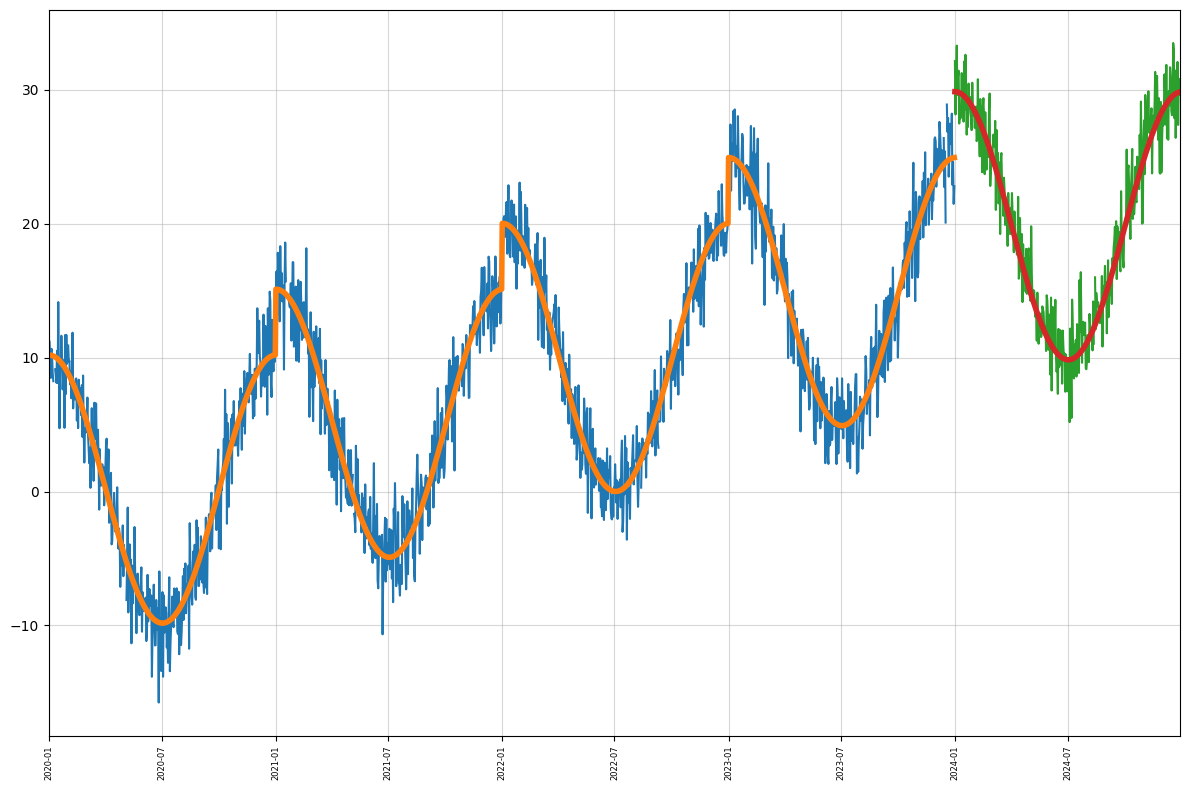

In [33]:
plt.figure(figsize=(12, 8))

plt.plot(x["date"], x["value"])
plt.plot(x["date"], y_pred_train, lw=4)
plt.plot(y["date"], y["value"])
plt.plot(y["date"], y_pred_test, lw=4)

plt.xticks(rotation=90, fontsize=6)

# plt.legend()
plt.grid(alpha=.5)

plt.margins(x=0)

plt.tight_layout()
plt.show()